You are provided with 4 minutes of video for training and 2 minutes of video for validation and another 2 minutes of video for testing. The video files are synthetically generated 640x640 frames in 30FPS, each frame is accurately labeled in the COCO format with an additional field named track_id.

In [2]:
import json
import cv2
import os
import matplotlib.pyplot as plt
import shutil
import glob
!pip install pylabel
import pylabel

In [ ]:
#Oluşturulan 1800 tane frame dosyasını 0001'den 1800'e kadar 4'lü şekillerde .jpg olarak isimlendirmemi sağlayan kod

dirpath = r'C:/Users/andyl/Desktop/yolo_dataset/valid/images'
dirname = os.path.basename(dirpath)

#pad değeri en uzun dosya ismi olan, 1800.jpg (4 basamaklı) 
#olacak şekilde diğer dosyaları da 0001 şeklinde paddingle numaralandırıyor

filepath_list = glob.glob(os.path.join(dirpath, '*.jpg'))
pad = len(str(len(filepath_list)))
for n, filepath in enumerate(filepath_list, 1):
    os.rename(
        filepath,
        os.path.join(dirpath, '{:>0{}}.jpg'.format(n, pad))
    )


# Coco formatından Yolo Formatına Geçiş

In [135]:
#coco label path'i
path_to_annotations = "C:/Users/andyl/Desktop/Stroma/challenge/annotations/instances_val.json"
#coco labellarına karşılık gelen görüntülerin path'i
path_to_images = "C:/Users/andyl/Desktop/yolo_dataset/valid/images"

In [136]:
#verisetini oynanabilir bir şemaya eklemeyi sağlayan kod
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="BCCD_coco")
dataset.df.head(100000)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,C:/Users/andyl/Desktop/yolo_dataset/valid/images,0000.jpg,,1,640,640,,,,,...,,,,,,,,,,1
1,C:/Users/andyl/Desktop/yolo_dataset/valid/images,0001.jpg,,2,640,640,,,,,...,,,,,,,,,,1
2,C:/Users/andyl/Desktop/yolo_dataset/valid/images,0002.jpg,,3,640,640,,,,,...,,,,,,,,,,1
3,C:/Users/andyl/Desktop/yolo_dataset/valid/images,0003.jpg,,4,640,640,,,,,...,,,,,,,,,,1
4,C:/Users/andyl/Desktop/yolo_dataset/valid/images,0004.jpg,,5,640,640,,,,,...,,,,,,,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,C:/Users/andyl/Desktop/yolo_dataset/valid/images,1795.jpg,,1796,640,640,,,,,...,,,,,,,,,,1
4201,C:/Users/andyl/Desktop/yolo_dataset/valid/images,1796.jpg,,1797,640,640,,,,,...,,,,,,,,,,1
4202,C:/Users/andyl/Desktop/yolo_dataset/valid/images,1797.jpg,,1798,640,640,,,,,...,,,,,,,,,,1


In [137]:
#verisetinin özellikleri

print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 1800
Number of classes: 2
Classes:['bolt', 'nut']
Class counts:
bolt    3258
nut      759
         188
Name: cat_name, dtype: int64
Path to annotations:
C:\Users\andyl\Desktop\Stroma\challenge\annotations


In [138]:
from IPython.display import Image, display


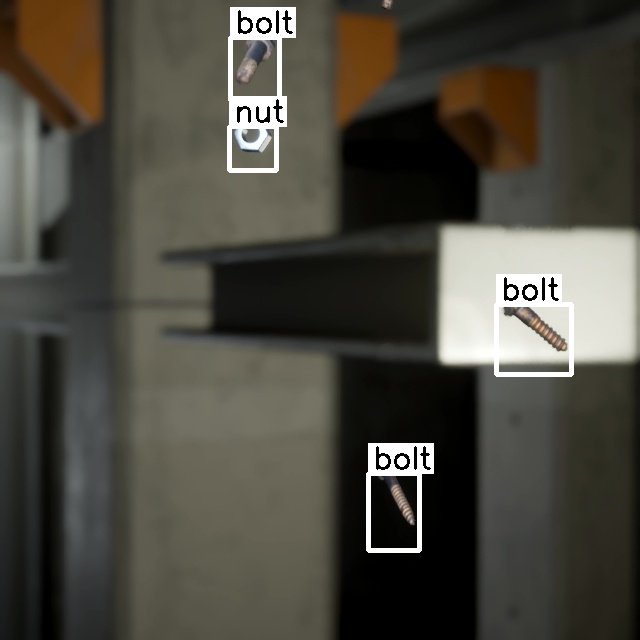

In [139]:
display(dataset.visualize.ShowBoundingBoxes(412))


In [ ]:
#veriseti doğruluğu görüldükten sonra yolo formatının yeri ve dönüştürme kodu çalıştırılabilir


In [140]:
dataset.path_to_annotations = "C:/Users/andyl/Desktop/yolo_dataset/valid"


In [141]:
dataset.export.ExportToYoloV5()[0]

Exporting files: 100%|████████████████████████████████████████████████████████████| 1800/1800 [00:06<00:00, 285.62it/s]


'training\\dataset.yaml'